In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np

In [2]:
df = pd.read_csv('./assignments_from_pool_Quality_6.tsv', sep="\t")

In [3]:
df = df.drop(columns=['GOLDEN:ad', 'GOLDEN:not_ad', 'GOLDEN:ban_insult_hard', 'GOLDEN:ban_shock_content', 'GOLDEN:ban_shock_content',
'HINT:text', 'HINT:default_language'])


In [4]:
df = df.fillna(0)
def f(row):
    if row['OUTPUT:ad'] == 'yes':
        val = 'ad'
    elif row['OUTPUT:not_ad'] != 0:
        val = 'not_ad'
    elif row['OUTPUT:ban_insult_hard'] != 0:
        val = 'ban_insult_hard'
    elif row['OUTPUT:ban_shock_content'] != 0:
        val = 'ban_shock_content'    
    else:
        val = ' '
    return val

df['OUTPUT:label'] = df.apply(f, axis=1)



In [5]:
df.head()

,INPUT:label,INPUT:comment,INPUT:task-id,OUTPUT:ad,OUTPUT:not_ad,OUTPUT:ban_insult_hard,OUTPUT:ban_shock_content,ASSIGNMENT:worker_id,OUTPUT:label
0,ad,Поклейка обоев за один день. Шпатлёвка стен и ...,124,yes,0,0,0,53dcb40e52b1591f44ed42d58f57ec1e,ad
1,not_ad,В Волгоградской области погибших от COVID-19 у...,472,no,0,0,True,53dcb40e52b1591f44ed42d58f57ec1e,ban_shock_content
2,ad,"Консультации: РВП, ВНЖ, гражданство РФ. Опытны...",66,yes,0,0,0,53dcb40e52b1591f44ed42d58f57ec1e,ad
3,ban_insult_hard,"Похдравляю, конситуции в РФ больше нет.. Слили...",269,no,0,True,0,53dcb40e52b1591f44ed42d58f57ec1e,ban_insult_hard
4,ban_insult_hard,Супер Очень важные новости! ЯндексФашистАгрега...,282,no,0,True,0,53dcb40e52b1591f44ed42d58f57ec1e,ban_insult_hard


In [6]:
df = df.drop(columns=['OUTPUT:ad', 'OUTPUT:not_ad', 'OUTPUT:ban_insult_hard', 'OUTPUT:ban_shock_content'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   INPUT:label           1525 non-null   object
 1   INPUT:comment         1525 non-null   object
 2   INPUT:task-id         1525 non-null   int64 
 3   ASSIGNMENT:worker_id  1525 non-null   object
 4   OUTPUT:label          1525 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.7+ KB


In [8]:
#сохранения в tsv
df.to_csv('Quality_6.tsv', sep="\t", index=False)

In [9]:
df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]

1351

In [10]:
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0]

174

In [23]:
# 10% неправильных ответов
df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]/df.count()[0]

0.8859016393442622

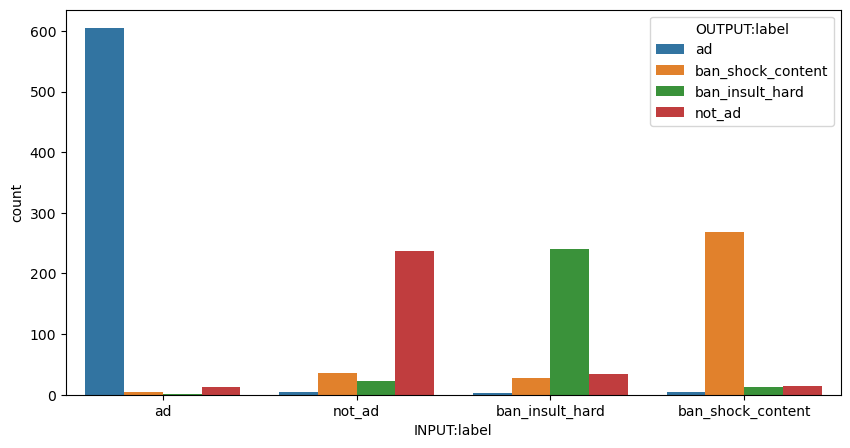

In [12]:
# 
_, axes = plt.subplots(1, sharey=True, figsize=(10,5))


sns.countplot(x='INPUT:label', hue='OUTPUT:label', data=df);

In [13]:
df[(df['INPUT:label'] != df['OUTPUT:label']) & (df['INPUT:label'] == 'ad')]

,INPUT:label,INPUT:comment,INPUT:task-id,ASSIGNMENT:worker_id,OUTPUT:label
7,ad,Выберете ли Вы в качестве подарка - Фотомозаик...,188,53dcb40e52b1591f44ed42d58f57ec1e,not_ad
11,ad,Выберете ли Вы в качестве подарка - Фотомозаик...,188,34b2442223f143bebff660ced175e0c9,not_ad
246,ad,"Друзья🙃Это ребята, у которых все повестки Боев...",106,9fbd799230a97ce2dcbc666cb53ae063,not_ad
393,ad,"Нужны отзывы!!. Кто заказываю тут окна, подели...",17,f2952385561ee8e7c44a6d5e48394699,not_ad
469,ad,"ЖК ""Джаз"". Вторая очередь. Скоро.. Началось ст...",198,bca46e60ea39762ce17cf9e0f93f47ae,not_ad
485,ad,"Нужны отзывы!!. Кто заказываю тут окна, подели...",17,8bf92db0e24580befa5d896ed1677870,not_ad
589,ad,Летание. Почему и как мы летаем?. / пер. с анг...,161,8bf92db0e24580befa5d896ed1677870,not_ad
649,ad,"ЖК ""Джаз"". Вторая очередь. Скоро.. Началось ст...",198,f96c8b489f1d17fac8d3eaf69bd7dbec,ban_shock_content
667,ad,Крутое приложение для любителей пива. Только ч...,120,8bf92db0e24580befa5d896ed1677870,not_ad
796,ad,Собака напала на велосипедистку. Велосипедисты...,134,bca46e60ea39762ce17cf9e0f93f47ae,ban_shock_content


In [14]:

df = df.fillna(0)
def f(row):
    if row['INPUT:label'] == row['OUTPUT:label']:
        val = 0
    else:
        val = 1
    return val

df['result'] = df.apply(f, axis=1)

In [22]:
df['result'].mean()

0.11409836065573771

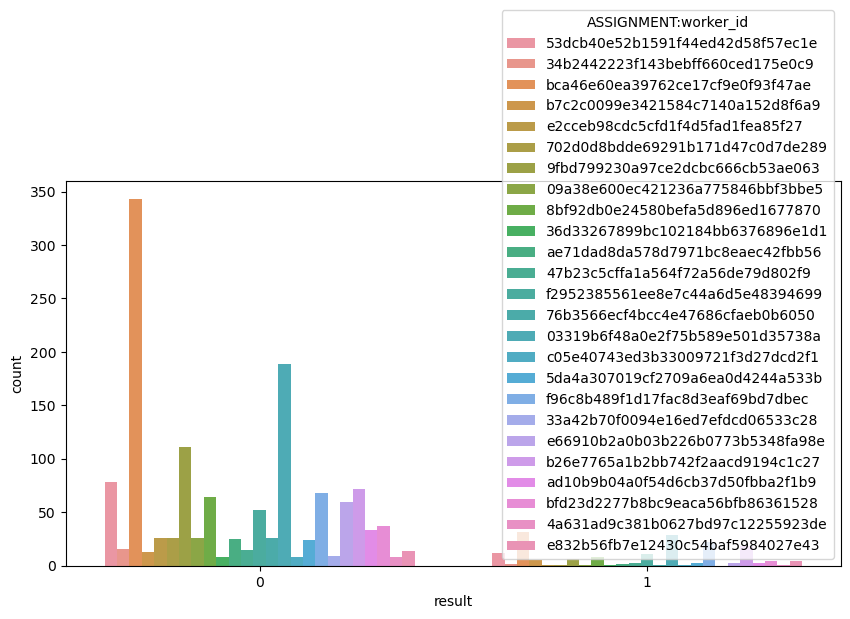

In [16]:
# 
_, axes = plt.subplots(1, sharey=True, figsize=(10,5))


sns.countplot(x='result', hue='ASSIGNMENT:worker_id', data=df);

In [17]:
pd.crosstab(df['INPUT:task-id'], df['result'], margins=True)

result,0,1,All
INPUT:task-id,,,
0,3,0,3
1,3,0,3
2,3,0,3
3,3,0,3
4,3,0,3
...,...,...,...
496,1,2,3
497,2,1,3
498,1,2,3


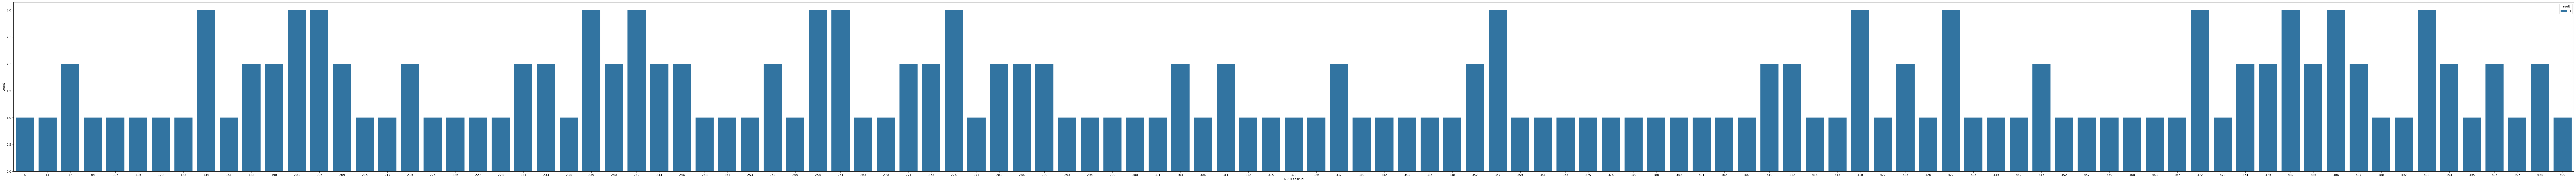

In [18]:
y = df[(df['result']==1)]
_, axes = plt.subplots(1, sharey=True, figsize=(150,10))
sns.countplot(x='INPUT:task-id', hue='result', data=y);

In [19]:
df.groupby(['INPUT:task-id'])[['result']].agg([np.mean])

,result
,mean
INPUT:task-id,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
495,0.333333
496,0.666667
